In [1]:
import numpy as np
import pandas as pd
import scipy

In [2]:
from ecoevocrm.consumer_resource_system import *
from ecoevocrm.consumer_resource_system import *
import ecoevocrm.utils as utils
import ecoevocrm.viz as viz
import ecoevocrm.coarse_graining as cg
import ecoevocrm.strain_pool

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

----

## Model parameters

### Traits

Set the number of resources in the system:

In [4]:
num_resources = 10

Define type(s) that will be present at the start of the simulation:

Here we define the initial population as consisting of only one type (which is the first type from the list of all possible types)

In [5]:
sigma_allpossible = utils.binary_combinations(num_resources, exclude_all_zeros=True)
sigma_allpossible = sigma_allpossible/sigma_allpossible.sum(axis=1, keepdims=1)

In [6]:
sigma = sigma_allpossible[0]

The initial composition of the population, as encoded in the $\sigma$ matrix, looks like this:

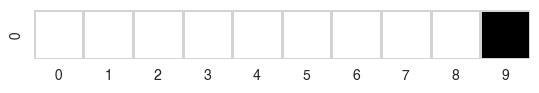

In [7]:
viz.matrix_plot(sigma, linecolor='lightgray', linewidths=1)

Set the initial abundance of each type:
    
(Here we set the initial abundance of each type to 1 individual)

In [8]:
N_init = np.ones(np.atleast_2d(sigma).shape[0])
N_init

array([1.])

### Costs

##### Define cost parameters for types:

Set the baseline cost $\xi$:

In [9]:
xi = 0.1

Set the cost per trait, $\chi_{i}$:

In [10]:
chi = 0.4

Set the trait interaction costs by defining a matrix, $\\J_{ij}$, that encodes the cost for each pair of traits:

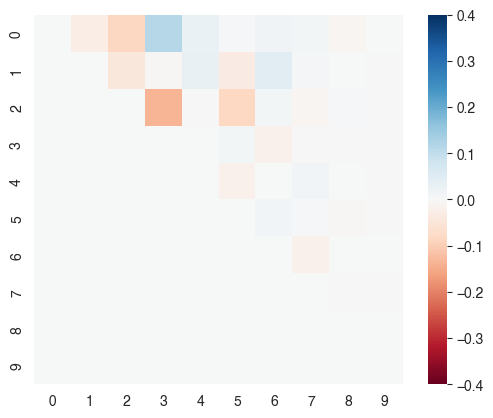

In [11]:
# J = None
J = utils.random_matrix((num_resources, num_resources), 'tikhonov_sigmoid', args={'n_star': 5, 'delta': 1}, triangular=True, diagonal=0)
viz.matrix_plot(J, vmin=-0.4, vmax=0.4)

### Environment

Set the initial amount of each resource:

(Here the last 5 resources are present, while the first 5 resources are absent initially)

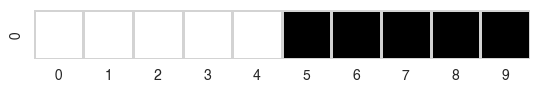

In [12]:
R_init = np.zeros(num_resources)
R_init[-5:] = 1
viz.matrix_plot(R_init, linecolor='lightgray', linewidths=1)

Set the influx of each resource:

(Here the last 5 resources have influx, while the first 5 resources have zero influx)

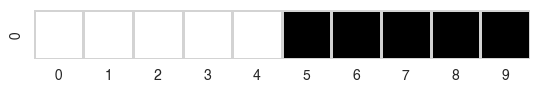

In [13]:
rho = np.zeros(num_resources)
rho[-5:] = 1
viz.matrix_plot(rho, linecolor='lightgray', linewidths=1)

Set the time constant for resource dynamics (will be 1 in practically all cases)

In [14]:
tau = 1

### Cross-feeding

Set the energy content for each resource (will typically be 1)

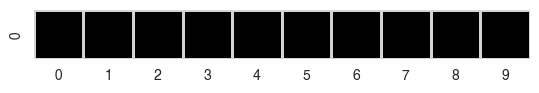

In [15]:
omega = np.ones(num_resources)
viz.matrix_plot(omega, vmin=0, linecolor='lightgray', linewidths=1)

Set the fraction of energy from each resource that is converted into other resource byproducts (rather than used for growth)

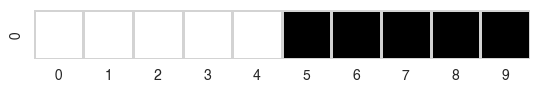

In [16]:
lamda = np.zeros(num_resources)
lamda[5:] = 0.2
viz.matrix_plot(lamda, linecolor='lightgray', linewidths=1, cbar=False)

Define which resources are converted into which other resources (as byproducts) by defining a matrix $D_{ij}$, where each entry $i,j$ gives the fraction of byproducts of resource $j$ that are converted to resource $i$ (i.e., $i \leftarrow j$). 

Here each of the last 5 resources gets converted to one of the first 5 resources.

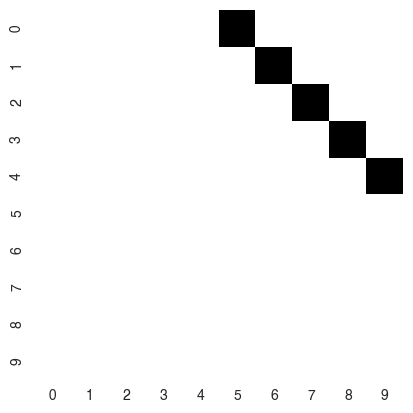

In [17]:
D = utils.random_matrix((num_resources, num_resources), 'binomial', args={'p': 0.0}, diagonal=0)
D += np.diag(np.array([1]*5), 5)
viz.matrix_plot(D)

## Simulate model

In [18]:
system = ConsumerResourceSystem(type_set=TypeSet(sigma=sigma, lamda=lamda, xi=xi, chi=chi, J=J, binarize_traits_J_cost_terms=True, mu=1e-10), 
                                rho=rho, tau=tau, omega=omega, D=D,
                                N_init=N_init, R_init=R_init, 
                                resource_dynamics_mode='explicit', 
                                max_time_step=1e3)

In [19]:
T_total = 1e6

In [20]:
system.run(T=T_total)

<AxesSubplot: >

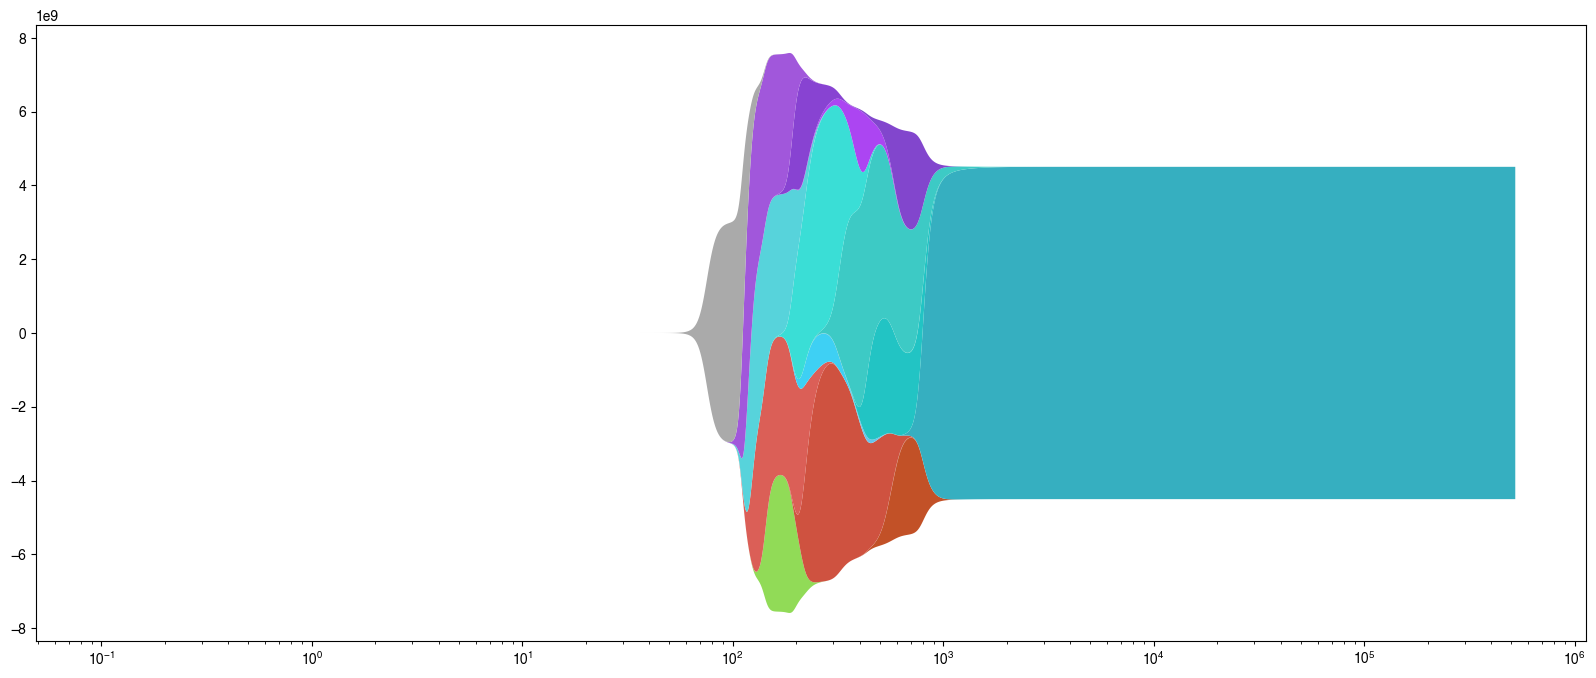

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
viz.stacked_abundance_plot(system, ax=ax, relative_abundance=False, apply_palette_depth=1, log_x_axis=True, color_seed=1)

<AxesSubplot: >

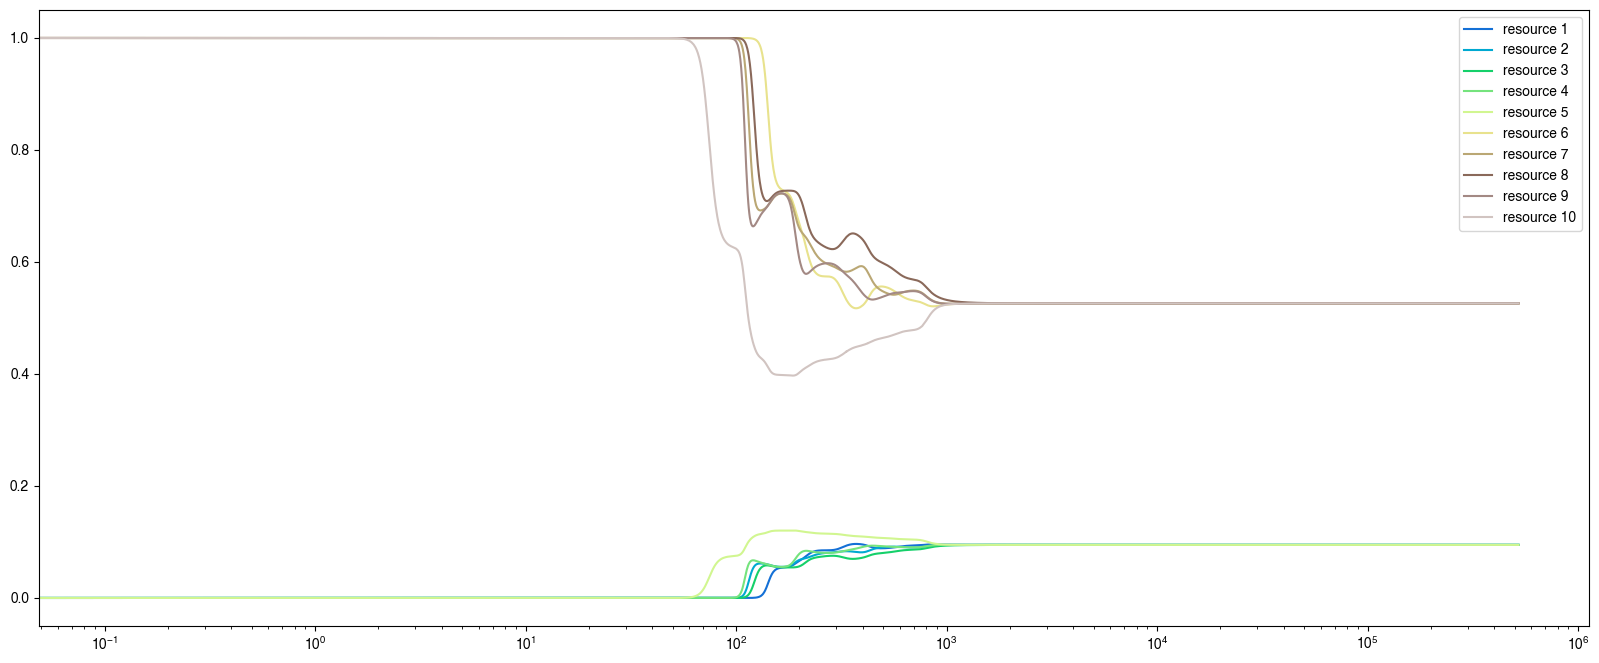

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
viz.resource_plot(system, ax=ax, stacked=False, relative=False, log_x_axis=True, log_y_axis=False, palette='terrain')

In [23]:
viz.matrix_plot(system.extant_type_set.sigma)

ValueError: zero-size array to reduction operation fmin which has no identity

In [34]:
system.type_set.sigma

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 1., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 0., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 1., 0., 1.],
       [0., 0., 0., 0., 0., 1., 1., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 1., 0., 1.],
       [0., 0., 0., 

In [68]:
with np.printoptions(threshold=np.inf):
    for tidx in range(system.N_series.shape[1]):
        # print(system.N_series[:, tidx])
        print(np.min(system.N_series[:, tidx]))

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [ ]:
stop

---------
---------

In [ ]:
system.t_series

In [ ]:
np.diff(system.t_series)

In [ ]:
plt.hist(np.diff(system.t_series)[np.diff(system.t_series) < 1e1], bins=100)
plt.show()

In [ ]:
np.count_nonzero(np.diff(system.t_series) < 1e3)/len(np.diff(system.t_series))

---------
---------

In [ ]:
T  = 1e6
dt = 1
t_series = np.arange(0, T, step=dt)

In [ ]:
l   = 1e0
k   = 1e-5
eps = 5e-4

In [ ]:
x0   = 1
x    = np.zeros_like(t_series)
x[0] = x0

v0   = 0
v    = np.zeros_like(t_series)
v[0] = v0

In [ ]:
for t in range(len(t_series)-1):
    dv = -l*v[t] + np.random.normal(0, eps) - k*(x[t]-x[0])
    v[t+1] = v[t] + dv*dt
    dx = v[t+1]
    x[t+1] = x[t] + dx*dt

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))
ax.plot(t_series, v, alpha=0.2, label='v')
ax.plot(t_series, x, label='x')
ax.legend()
ax.set_ylim(0, 2)
ax.axhline(x[0], color='k', alpha=1, ls='-')
ax.axhline(0.9, color='darkblue', alpha=0.5, ls=':')
ax.axhline(1.1, color='darkblue', alpha=0.5, ls=':')
ax.axhline(x[0]+np.std(x), color='k', alpha=0.3, ls='--')
ax.axhline(x[0]-np.std(x), color='k', alpha=0.3, ls='--')
ax.axhline(x[0]+2*np.std(x), color='k', alpha=0.2, ls='--')
ax.axhline(x[0]-2*np.std(x), color='k', alpha=0.2, ls='--')
ax.axhline(x[0]+3*np.std(x), color='k', alpha=0.1, ls=':')
ax.axhline(x[0]-3*np.std(x), color='k', alpha=0.1, ls=':')

In [ ]:
T  = 1e6
dt = 1000
t_series = np.arange(0, T, step=dt)

In [ ]:
l   = 1e-3
k   = 1e-8
eps = 1e-8

In [ ]:
x0   = 1
x    = np.zeros_like(t_series)
x[0] = x0

v0   = 0
v    = np.zeros_like(t_series)
v[0] = v0

In [ ]:
for t in range(len(t_series)-1):
    dv = -l*v[t] + np.random.normal(0, eps) - k*(x[t]-x[0])
    v[t+1] = v[t] + dv*dt
    dx = v[t+1]
    x[t+1] = x[t] + dx*dt

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))
ax.plot(t_series, v, alpha=0.2, label='v')
ax.plot(t_series, x, label='x')
ax.legend()
ax.set_ylim(0, 2)
ax.axhline(x[0], color='k', alpha=1, ls='-')
ax.axhline(0.9, color='darkblue', alpha=0.5, ls=':')
ax.axhline(1.1, color='darkblue', alpha=0.5, ls=':')
ax.axhline(x[0]+np.std(x), color='k', alpha=0.3, ls='--')
ax.axhline(x[0]-np.std(x), color='k', alpha=0.3, ls='--')
ax.axhline(x[0]+2*np.std(x), color='k', alpha=0.2, ls='--')
ax.axhline(x[0]-2*np.std(x), color='k', alpha=0.2, ls='--')
ax.axhline(x[0]+3*np.std(x), color='k', alpha=0.1, ls=':')
ax.axhline(x[0]-3*np.std(x), color='k', alpha=0.1, ls=':')

In [ ]:
T  = 1e6
dt = 1000
t_series = np.arange(0, T, step=dt)

In [ ]:
l   = 1e-3
k   = 1e-8
eps = 1e-8

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

for i in range(num_resources):
    print(i+1)
    
    x0   = 1
    x    = np.zeros_like(t_series)
    x[0] = x0

    v0   = 0
    v    = np.zeros_like(t_series)
    v[0] = v0

    for t in range(len(t_series)-1):
        dv = -l*v[t] + np.random.normal(0, eps) - k*(x[t]-x[0])
        v[t+1] = v[t] + dv*dt
        dx = v[t+1]
        x[t+1] = x[t] + dx*dt
        
    ax.plot(t_series, x, label=f"x{i+1}")

ax.legend()
ax.set_ylim(0, 2)
ax.axhline(0.9, color='k', alpha=0.4, ls=':')
ax.axhline(1.1, color='k', alpha=0.4, ls=':')